# Random Forests Exercise

### Random Forests with sklearn
In this sprint we will be practicing using the `scikit-learn` implementation of random forests. For this exercise, we'll be attempting to classify whether a customer churns or not given a set of inputs. We can use the Random Forest to get more insight into the churn data. Only about 15% of the data points are positive for churn. 

The documentation for sklearn's random forest can be found here: [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

You might find the documentation for these sklearn functions helpful: [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Assignment: https://github.com/GalvanizeDataScience/random-forests/blob/master/pair.md

Lecture: https://github.com/gSchool/DSI_Lectures/blob/master/random-forest/natalie_hunt/random_forests.ipynb

Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

1. Load the `data/churn.csv` file into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
%load_ext autoreload

In [2]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_6_Lectures/Random forests assignment/data/churn.csv')

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


2. Convert the "no", "yes" values to booleans (True/False) as well as any booleans that are stored as strings.


In [4]:
df = df.replace({'yes' : True,
           'no' : False,
           'False.' : False,
           'True.' : True})

In [5]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df = df.dropna()

3. Remove the features which aren't boolean or meaningfully numerical.


In [7]:
df['Average Day Call Time'] = df['Day Mins'] / df['Day Calls']

In [8]:
df['Average Eve Call Time'] = df['Eve Mins'] / df['Eve Calls']

In [9]:
df['Average Night Call Time'] = df['Night Mins'] / df['Night Calls']

In [10]:
df['Average Intl Call Time'] = df['Intl Mins'] / df['Intl Calls']

In [11]:
df = df.drop(columns = ['Phone', 'State'])

4. Make a numpy array called `y` containing the churn values.
1. Make a 2 dimensional numpy array containing the feature data (everything except the labels) called `X`.


In [12]:
df['Churn?'].unique()
df = df.dropna()

In [13]:
y = df['Churn?'].values
X = df.drop(columns='Churn?')

6. Use sklearn's `train_test_split` to split into train and test set.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
clf = RandomForestClassifier()

In [16]:
clf.fit(X_train, y_train)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
print(clf.feature_importances_)

[0.02074596 0.00461249 0.07934135 0.01759405 0.02628352 0.11781392
 0.02292018 0.10514245 0.05585892 0.02113342 0.05212657 0.02946905
 0.02471805 0.02593143 0.04219972 0.03503862 0.04016458 0.09717335
 0.06335614 0.04121194 0.0310588  0.04610549]


7. What is the accuracy score on the test data?

In [18]:
clf = RandomForestClassifier(oob_score = True)

In [19]:
clf.fit(X_train, y_train)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

8. What is the accuracy score on the test data?


In [20]:
clf.oob_score_

0.9194847020933977

In [21]:
print("Accuracy = {:.3f}".format(np.mean(clf.predict(X_test) == y_test)))

Accuracy = 0.941


9. Draw a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the results.

In [22]:
y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[708,   7],
       [ 42,  71]])

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[708   7]
 [ 42  71]]


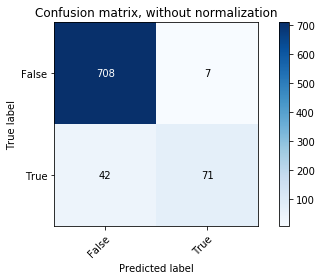

In [24]:
class_names = df['Churn?'].unique()
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

9. What are the precision and recall?

Precision means the percentage of your results which are relevant


Recall refers to the percentage of total relevant results correctly classified by your algorithm


In [25]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('precision score: {:2.3f}'.format(precision))
print('recall score: {:2.3f}'.format(recall))

precision score: 0.910
recall score: 0.628


11. Build the `RandomForestClassifier` again setting the out of bag parameter -- `oob_score` to be `True`. Compare the out of bag score of the *training* set with the accuracy on the *test* set. How close are they?

    It might complain that you are using too few trees to reliably use out of bag score. You can still see the results, but try increasing the number of trees as well to remove the warning.

In [26]:
clf = RandomForestClassifier(n_estimators = 300, oob_score = True)
clf.fit(X_train, y_train)
clf.oob_score_

0.9488727858293076

In [27]:
print("Accuracy = {:.3f}".format(np.mean(clf.predict(X_test) == y_test)))

Accuracy = 0.947


12. Say you would like to give advice for what to focus on to prevent churn. You would like to be able to say what specifics about a user you should focus on changing in order to make them not churn. Use sklearn's model to get the feature importances. What are the top five features? What could you do to potentially limit churn?

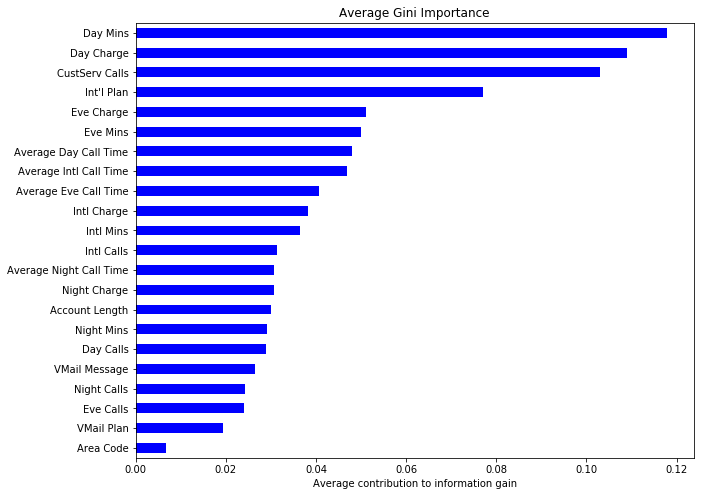

In [30]:
feat_scores = pd.Series(clf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()

ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [ ]:
# TO DO MAKE ABOVE WITHOUT AVERAGE DAY ETC

In [ ]:
clf = RandomForestClassifier(n_estimators = 300, oob_score = True)
clf.fit(X_train, y_train)
clf.oob_score_

In [37]:
ns = np.arange(10,500, 50)

In [38]:
ns

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])

13. Try modifying the number of trees. The default is 10 trees. Try 5-10 different values for the number of trees and make a graph of the number of trees versus the accuracy score. Is there a point where creating more trees doesn't seem to help anymore?

    If you get an inconsistent graph, try creating a few random forests for each number and averaging them. This should smooth out your graph.

In [39]:
def regressiontreefind():
    ns = np.arange(10, 500, 50)
    scorelst = []
    for i in ns:
        clf = RandomForestClassifier(n_estimators = i)
        clf.fit(X_train, y_train)
        scorelst.append(np.mean(clf.predict(X_test) == y_test))
    return scorelst
    

In [41]:
scorelst = regressiontreefind()

In [54]:
scorelst

[0.9492753623188406,
 0.9396135265700483,
 0.9480676328502415,
 0.9444444444444444,
 0.9432367149758454,
 0.9456521739130435,
 0.9468599033816425,
 0.9456521739130435,
 0.9444444444444444,
 0.9444444444444444]

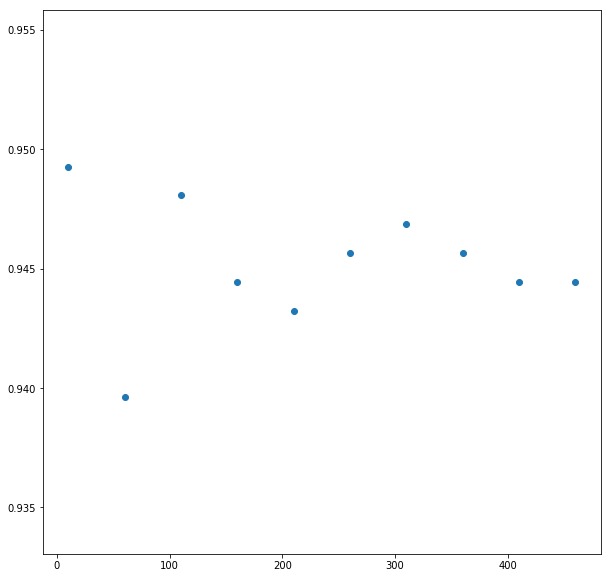

In [58]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(ns, scorelst)